# Demonstration of Both Models Working Together

In the following example, we're going to show what happens if we use both models to support an example where we need to determine whether first, the image contains a car, and second, whether the car is damaged or not. The justification of why we have separate models is based on needing specific classifiers trained for different purposes.

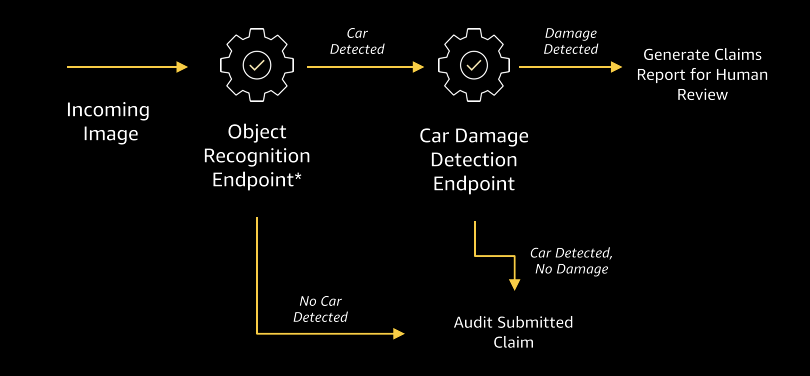

### Imports

In [1]:
import os
os.chdir('../')
# print(os.getcwd())
from src.objectdetector import ObjectDetector
from src.cardamagedetector import CarDamageDetector

### Instantiate both Models

In [2]:
od = ObjectDetector('object-detection-2020-03-06-04-04-36-981')
cdd = CarDamageDetector('image-classification-2020-03-13-00-38-30-077')

Instantiating ObjectDetector
Adding Class Labels
Added 80 Class Labels
Instantiating Car Damage Detector
Adding Class Labels
Added 2 Class Labels


### Business Logic for Combining Classifiers

In [3]:
def determine_if_needs_audit_or_filing(od, cdd, car_image_url, car_damage_image_url, acceptable_thresh = 0.1):
    
    obj_to_detect = 'car'
    expected_predicted_class = 'Damage'
    #download the image
    image_local_path = od.download_image(car_image_url, to_save_filename='test-image-car.jpg')
    image_damage_local_path = od.download_image(car_damage_image_url, to_save_filename='test-image-damage.jpg')

    #score the image with the first model
    classes_and_scores = od.visualize_detection(image_local_path, acceptable_thresh)
    print(classes_and_scores)
    #1. first run it through the obhect detector

    goto_second_classifier = False
    #Determine if a car exists in the object
    if obj_to_detect in classes_and_scores:
        if classes_and_scores[obj_to_detect] > acceptable_thresh:
            goto_second_classifier = True
    
    if goto_second_classifier:    
    #2. Now check if the image contains a damaged vehicle
        predicted_class = cdd.predict_if_contains_damage(image_damage_local_path)
        if expected_predicted_class == 'Damage':
            print('No Audit Needed, execute workflow to create report')
        else:
            print('Audit Required')
        

## Example Image

In [4]:
car_image_url = 'https://upload.wikimedia.org/wikipedia/commons/8/87/M3_E36_Limousine.jpg'

car_image_damage_url = 'https://previews.123rf.com/images/ikrolevetc/ikrolevetc1803/ikrolevetc180300021/98840860-broken-headlight-on-the-car-close-up.jpg'

### Example Logic with Inferencing

downloading Image from https://upload.wikimedia.org/wikipedia/commons/8/87/M3_E36_Limousine.jpg
Saved Image to test-image-car.jpg
downloading Image from https://previews.123rf.com/images/ikrolevetc/ikrolevetc1803/ikrolevetc180300021/98840860-broken-headlight-on-the-car-close-up.jpg
Saved Image to test-image-damage.jpg


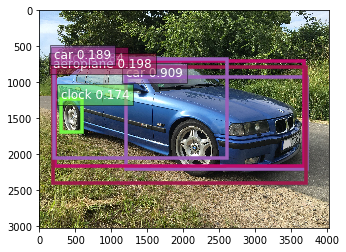

{'car': 0.18906791508197784, 'truck': 0.8835909366607666, 'aeroplane': 0.1981581300497055, 'clock': 0.17380325496196747}
Image Name test-image-damage.jpg
Result: label - Damage, probability - 0.9999958276748657
No Audit Needed, execute workflow to create report


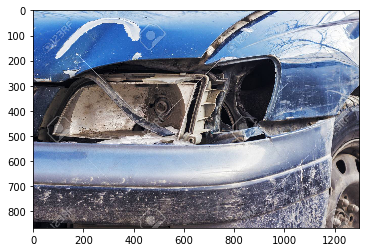

In [5]:
determine_if_needs_audit_or_filing(od, 
                                   cdd, 
                                   car_image_url = car_image_url,
                                   car_damage_image_url  = car_image_damage_url
                                  )
                                   